In [ ]:
!pip install --upgrade tf-keras-vis tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.python.client import device_lib

In [ ]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15460965312143345895
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15075597324984686976
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
img_rows= x_train[0].shape[0]
img_cols= x_train[0].shape[1]

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test= x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] *x_train.shape[2]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape = input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation= 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics=['accuracy'])

In [ ]:
batch_size=128
epochs=6

hist = model.fit(x_train,
                 y_train,
                 batch_size= batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(x_test,y_test))

Epoch 1/6
469/469 [==============================] - 16s 9ms/step - loss: 0.7720 - accuracy: 0.7928 - val_loss: 0.3056 - val_accuracy: 0.9089
Epoch 2/6
469/469 [==============================] - 4s 9ms/step - loss: 0.2667 - accuracy: 0.9196 - val_loss: 0.2129 - val_accuracy: 0.9367
Epoch 3/6
469/469 [==============================] - 4s 8ms/step - loss: 0.2085 - accuracy: 0.9384 - val_loss: 0.1699 - val_accuracy: 0.9496
Epoch 4/6
469/469 [==============================] - 4s 7ms/step - loss: 0.1699 - accuracy: 0.9490 - val_loss: 0.1587 - val_accuracy: 0.9532
Epoch 5/6
469/469 [==============================] - 4s 8ms/step - loss: 0.1452 - accuracy: 0.9566 - val_loss: 0.1504 - val_accuracy: 0.9510
Epoch 6/6
469/469 [==============================] - 4s 9ms/step - loss: 0.1281 - accuracy: 0.9615 - val_loss: 0.1247 - val_accuracy: 0.9629


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss', score[0])
print('test accuracy', score[1])

test loss 0.12472421675920486
test accuracy 0.9628999829292297


In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue

  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


In [ ]:
filters, biases = model.layers[0].get_weights()

In [ ]:
print(filters.shape)

(3, 3, 1, 32)


In [ ]:
f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min)/ (f_max-f_min)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

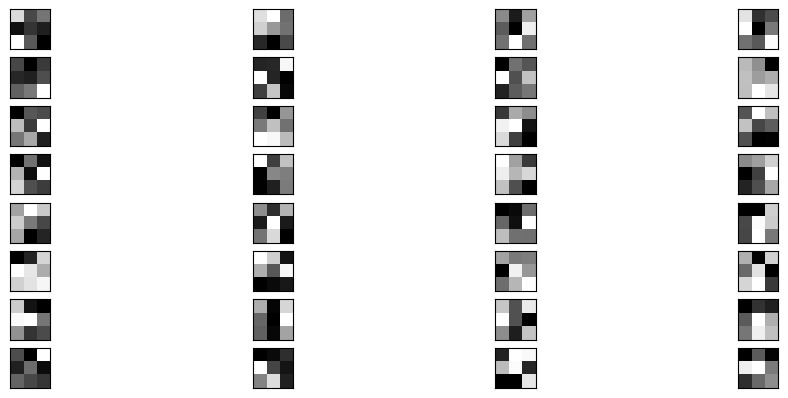

In [ ]:
n_filters, ix = 32,1
plt.figure(figsize=(12,20))

for i in range(n_filters):
  f = filters[:,:,:,i]

  ax = plt.subplot(n_filters, 4,ix)
  ax.set_xticks([])
  ax.set_yticks([])

  plt.imshow(np.squeeze(f,axis=2), cmap='gray')
  ix+=1

plt.show()

In [ ]:
from tensorflow.keras.models import Model

layer_output = [layer.output for layer in model.layers[:2]]

activation_model =Model(inputs = model.input, outputs = layer_output)

(-0.5, 27.5, 27.5, -0.5)

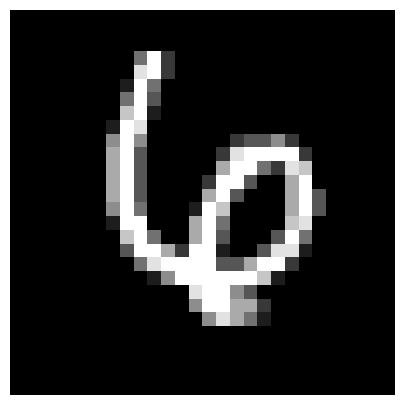

In [ ]:
img_tensor = x_test[22].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0], cmap='gray')
plt.axis('off')

In [ ]:
activations = activation_model.predict(img_tensor)
print("number of layer activations:" + str(len(activations)))

1/1 [==============================] - 0s 288ms/step
number of layer activations:2


In [ ]:
first_layer_activations = activations[0]
second_layer_activations = activations[1]

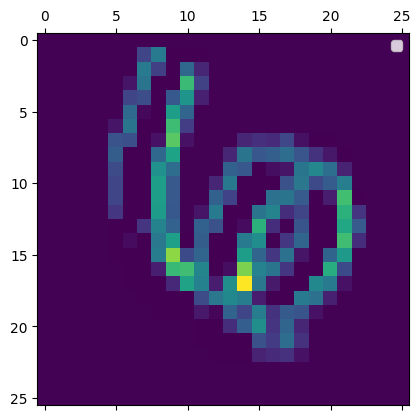

In [ ]:
plt.matshow(first_layer_activations[0,:,:,3], cmap='viridis')
plt.legend()

In [ ]:
def display_activation(activations, col_size, row_size, act_index):
  activation = activations[act_index]
  activation_index = 0
  fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))
  for row in range(0,row_size):
    for col in range(0, col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index], cmap='viridis')
      activation_index += 1

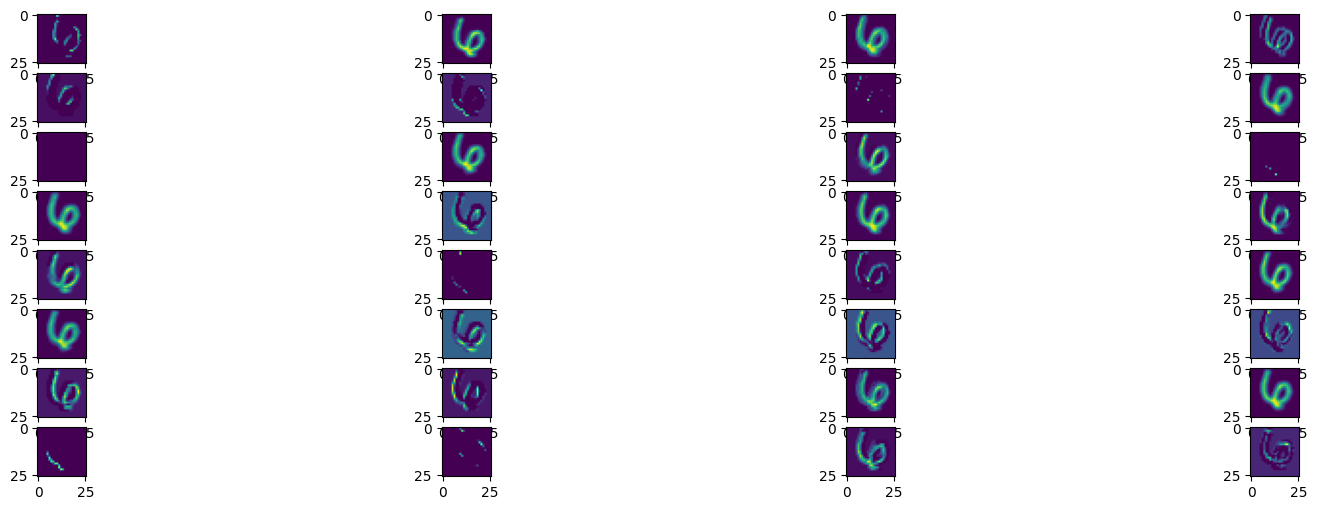

In [ ]:
display_activation(activations, 4, 8,0)